In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
digits=datasets.load_digits()

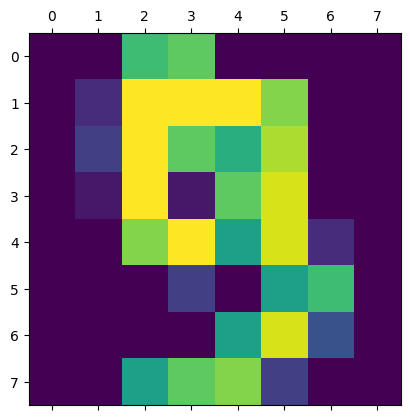

In [3]:
X=digits.data
y=digits.target
plt.matshow(X[9].reshape(8,8))

In [4]:
X=torch.FloatTensor(X)
y=torch.LongTensor(y)

In [5]:
print(X.shape)
print(y.shape)
print(X.shape)

torch.Size([1797, 64])
torch.Size([1797])
torch.Size([1797, 64])


In [6]:
class DigitClassifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.input_layer = nn.Linear(64,128)
    self.h1 = nn.Linear(128,64)
    # self.h2 = nn.Linear(64,32)
    self.output = nn.Linear(64,10)


  def forward(self,x):

    x=F.relu(self.input_layer(x))
    x=F.relu(self.h1(x))
    # x=F.relu(self.h2(x))
    x=F.log_softmax(self.output(x), dim=1)

    return x


In [7]:
torch.manual_seed(40)
model1 = DigitClassifier()
model1

DigitClassifier(
  (input_layer): Linear(in_features=64, out_features=128, bias=True)
  (h1): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [8]:

loss_function=nn.NLLLoss()
optimizer1=torch.optim.Adam(model1.parameters(),lr=0.001,weight_decay=1e-5)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=37)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train, test_size=0.2,random_state=37)
print

<function print>

In [10]:
def trainingFunction(model,X_train,y_train,X_val,y_val,optimizer):

  epochs=100
  batch_size=50
  calculate_loss=[]
  calculate_val_loss=[]
  calculate_test_loss=[]
  calculate_accuracy=[]


  for epoch in range(epochs):
    l=0
    loss_val=0
    correct_predictions=0
    for i in range(0, len(X_train), batch_size):
      Xbatch = X_train[i:i+batch_size]
      y_pred = model(Xbatch)
      ybatch = y_train[i:i+batch_size]
      loss=loss_function(y_pred,ybatch)

      l2_reg = torch.tensor(0.)
      for param in model.parameters():
          l2_reg += torch.norm(param, p=2)
      loss += 0.01 * l2_reg

      optimizer.zero_grad()
      loss.backward()

      # for param in model.parameters():
      #   print(param.grad)

      optimizer.step()
      l+=loss.item()
      correct_predictions += (y_pred.argmax(dim=1) == ybatch).sum().item()

    model.eval()
    with torch.no_grad():

      y_val_pred = model(X_val)
      val_loss=loss_function(y_val_pred,y_val)
      loss_val+=val_loss.item()


    loss_val/=len(X_val)
    calculate_val_loss.append(loss_val)
    l/=len(X_train)/batch_size
    calculate_loss.append(l)
    calculate_accuracy.append(correct_predictions / len(X_train))
  print(calculate_accuracy)
    # print(f' epoch : {epoch} , loss :{l } validation loss :{loss_val}')
  print(correct_predictions / len(X_train))
  print(calculate_loss)
  plt.plot(range(epochs), calculate_loss, label='training loss')
  plt.plot(range(epochs), calculate_val_loss, label='validation loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

In [11]:
def test_validation(X_test,y_test,model):
  correct=0
  j=0
  with torch.no_grad():
    for i , data in enumerate(X_test):

      data = data.unsqueeze(0)

      y_valed = torch.log_softmax(model(data), dim=1)

      while 10<i and i<20:

        print(f' {i+1}.)  {str(y_valed)} \t {y_test[i]} \t { y_valed.argmax().item()}')
        break;


      if y_valed.argmax().item() == y_test[i]:
        correct+=1

    accuracy=correct/len(X_test)*100
    print(f'accuracy : {accuracy}')

  print(f'we got {correct} correct predictions out of {len(X_test)}.')

In [12]:
def validationCheck(X_val,y_val,model):
  correct=0
  j=0
  with torch.no_grad():
    for i , data in enumerate(X_val):

      data = data.unsqueeze(0)

      y_valedd = torch.log_softmax(model(data), dim=1)

      while 10<i and i<20:

        print(f' {i+1}.)  {str(y_valedd)} \t {y_val[i]} \t { y_valedd.argmax().item()}')
        break;


      if y_valedd.argmax().item() == y_val[i]:
        correct+=1


    accuracy=correct/len(X_val)*100
    print(accuracy)


  print(f'we got {correct} correct predictions out of {len(X_val)}.')

[0.5683202785030461, 0.8825065274151436, 0.9425587467362925, 0.9643167972149695, 0.9738903394255874, 0.9834638816362054, 0.9904264577893821, 0.9912967798085291, 0.9930374238468234, 0.9956483899042646, 0.9965187119234117, 0.9982593559617058, 0.9982593559617058, 0.9982593559617058, 0.999129677980853, 0.9982593559617058, 0.999129677980853, 0.9982593559617058, 0.9982593559617058, 0.9982593559617058, 0.999129677980853, 0.999129677980853, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0
[1.7078086487410689, 0.6579612990479764, 0.3799998476206478, 0.2947275752965215, 0.25296897162967813, 0.22475593006019493, 0.20415950096410912, 0.18793306952979483, 0.17

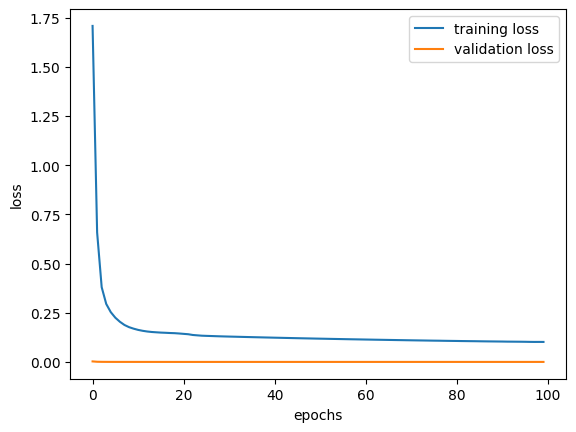

In [13]:
trainingFunction(model1,X_train,y_train,X_val,y_val,optimizer1)

In [14]:
test_validation(X_test,y_test,model1)

 12.)  tensor([[ -8.3324,  -0.5227,  -1.1624, -14.7714, -12.0303,  -5.7039,  -3.7290,
         -14.0561,  -2.7068, -12.4974]]) 	 2 	 1
 13.)  tensor([[-3.0279e-05, -2.2658e+01, -1.7135e+01, -2.0907e+01, -1.2220e+01,
         -1.3227e+01, -1.3243e+01, -1.3075e+01, -1.1281e+01, -1.1863e+01]]) 	 0 	 0
 14.)  tensor([[ -7.4634,  -9.6886,  -7.8392, -11.2388,  -8.2617,  -0.0439,  -9.2509,
          -3.1959,  -7.4075, -10.1497]]) 	 5 	 5
 15.)  tensor([[ -6.0068, -10.9379, -17.2171, -16.7710,  -0.0299, -13.0542,  -3.6175,
          -9.3336, -13.1662, -21.9227]]) 	 4 	 4
 16.)  tensor([[-10.2953,  -3.3715,  -7.5259,  -8.1783,  -9.4720,  -7.7880, -10.5689,
          -4.3579,  -0.0508,  -6.8920]]) 	 8 	 8
 17.)  tensor([[-1.6468e+01, -1.2800e+01, -1.7330e+01, -1.4649e+01, -1.1302e+01,
         -1.0509e+01, -1.9974e+01, -4.6252e-05, -1.5020e+01, -1.2723e+01]]) 	 7 	 7
 18.)  tensor([[-1.1399e-03, -1.7253e+01, -1.1404e+01, -1.5459e+01, -1.2053e+01,
         -7.3982e+00, -8.3353e+00, -8.7047e+00, -

In [15]:
validationCheck(X_val,y_val,model1)

 12.)  tensor([[-1.4544e+01, -1.0353e+01, -1.4812e+01, -1.1130e+01, -1.0497e+01,
         -1.0655e+01, -1.8625e+01, -1.9806e-03, -1.2551e+01, -6.2784e+00]]) 	 7 	 7
 13.)  tensor([[-2.0156e+01, -1.4006e-04, -1.7718e+01, -2.2334e+01, -8.9170e+00,
         -1.6829e+01, -1.2832e+01, -1.4164e+01, -1.2830e+01, -2.1926e+01]]) 	 1 	 1
 14.)  tensor([[-1.2151e+01, -1.7121e+01, -1.4876e+01, -8.7664e+00, -1.5956e+01,
         -1.3696e+01, -1.2202e+01, -1.5064e+01, -8.3983e-04, -7.3061e+00]]) 	 8 	 8
 15.)  tensor([[-1.7363e+01, -1.4251e+01, -6.5961e-04, -7.3392e+00, -2.4938e+01,
         -1.2634e+01, -1.7058e+01, -1.3448e+01, -1.2312e+01, -1.7277e+01]]) 	 2 	 2
 16.)  tensor([[-1.0022e+01, -4.9867e+00, -1.1254e+01, -1.3830e+01, -6.4014e+00,
         -9.0341e-03, -9.1653e+00, -1.1473e+01, -9.1270e+00, -8.4037e+00]]) 	 5 	 5
 17.)  tensor([[-1.6987e+01, -1.0619e+01, -1.1305e+01, -7.2663e+00, -1.8622e+01,
         -7.5776e-04, -1.7063e+01, -1.0898e+01, -1.5687e+01, -1.2623e+01]]) 	 5 	 5
 18.)  ten